In [285]:
import pandas as pd
suburbs= pd.read_csv('../../data/curated/Processed Data Final.csv')


In [286]:
suburbs.columns

Index(['distance_to_CBD', 'time_to_CBD', 'distance_to_station',
       'time_to_station', 'year', 'Average_household_size',
       'Average_num_psns_per_bedroom', 'Median_age_persons', 'Tot_P_P',
       'average_quarterly_count', 'SAL_CODE', 'median_score', 'average_price',
       'proximity_to_beach', 'airbnb_count', 'commercial density',
       'education density', 'food_establishments density',
       'healthcare density', 'industrial density', 'public_transport density',
       'recreation density', 'residential density', 'shopping density',
       'pop density', 'interest_rate', 'Median_tot_fam_inc_weekly/inflation',
       'Median_tot_hhd_inc_weekly/inflation',
       'Median_tot_prsnl_inc_weekly/inflation', 'gdp_cbd/inflation/beach',
       'gdp_cbd/inflation/cbd', 'gpd/inflation/airbnb',
       'average_weekly_rent/inflation/household_size',
       'A Crimes against the person/per_person',
       'B Property and deception offences/per_person',
       'C Drug offences/per_person

In [287]:
# lower case all columns
suburbs.columns = map(str.lower, suburbs.columns)

# replace spaces with underscores in column names
suburbs.columns = suburbs.columns.str.replace(' ', '_')


In [288]:
# merge with shapefile find name

import geopandas as gpd
SAL = gpd.read_file("../../data/landing/SAL_2021_AUST_GDA2020.shp")

In [289]:
# Filter out non-numeric values
SAL = SAL[SAL['SAL_CODE21'].apply(lambda x: x.isnumeric())]

# Ensure 'SAL_CODE21' is of type int in SAL GeoDataFrame
SAL['SAL_CODE21'] = SAL['SAL_CODE21'].astype(int)

# Merge top_ten with SAL GeoDataFrame on 'sal_code' and 'SAL_CODE21'
suburbs = SAL.merge(suburbs, left_on='SAL_CODE21', right_on='sal_code')

In [290]:
import pandas as pd

# Filter the DataFrame 
suburbs_2024 = suburbs[suburbs['year'] == 2024]

# Define the affordability index formula 
suburbs_2024['affordability_index'] = (
    suburbs_2024['median_tot_hhd_inc_weekly/inflation'] / 
    (suburbs_2024['average_weekly_rent/inflation/household_size'])
)

# Sort the new DataFrame by affordability index in descending order (higher index means better affordability)
suburbs_sorted_2024= suburbs_2024.sort_values(by='affordability_index', ascending=False)

# Display the updated DataFrame with the new 'affordability_index' column
suburbs_sorted_2024.head()


/Users/hkharith/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,SAL_CODE21,SAL_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,...,gdp_cbd/inflation/cbd,gpd/inflation/airbnb,average_weekly_rent/inflation/household_size,a_crimes_against_the_person/per_person,b_property_and_deception_offences/per_person,c_drug_offences/per_person,d_public_order_and_security_offences/per_person,e_justice_procedures_offences/per_person,f_other_offences/per_person,affordability_index
1347,20590,Cobblebank,2,Victoria,AUS,Australia,7.5459,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.141862,0.000771,...,12.880860,4.318757,84.010307,0.009115,0.015086,0.001647,0.001647,0.002561,0.000000,0.089716
34,20011,Aintree,2,Victoria,AUS,Australia,6.7302,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.126428,0.000688,...,12.738875,4.318757,88.121655,0.004471,0.011412,0.000472,0.000864,0.001885,0.000000,0.088354
5793,22740,Weir Views,2,Victoria,AUS,Australia,5.7297,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.189646,0.000586,...,13.016710,4.187126,87.613966,0.011151,0.028254,0.001245,0.002644,0.006675,0.000000,0.084913
5195,22382,Strathtulloh,2,Victoria,AUS,Australia,12.0773,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.187793,0.001234,...,12.949672,4.187126,91.540643,0.010069,0.027210,0.001142,0.000816,0.005372,0.000163,0.084124
2868,21284,Kalkallo,2,Victoria,AUS,Australia,7.0219,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.122266,0.000716,...,12.802673,4.035504,98.027775,0.005657,0.022771,0.000907,0.001021,0.002493,0.000000,0.077302


In [291]:
top_ten = suburbs_sorted_2024.nlargest(10, 'affordability_index')
print(top_ten[['sal_code', 'affordability_index']])

      sal_code  affordability_index
1347     20590             0.089716
34       20011             0.088354
5793     22740             0.084913
5195     22382             0.084124
2868     21284             0.077302
5533     22582             0.077170
1698     20743             0.075595
957      20420             0.074719
3427     21597             0.074032
3336     21559             0.074009


In [292]:
top_ten['SAL_NAME21']

1347           Cobblebank
34                Aintree
5793           Weir Views
5195         Strathtulloh
2868             Kalkallo
5533            Truganina
1698             Derrimut
957      Burnside Heights
3427          Manor Lakes
3336    Lysterfield South
Name: SAL_NAME21, dtype: object

In [293]:
bottom_ten = suburbs_sorted_2024.nsmallest(10, 'affordability_index')
print(bottom_ten[['sal_code', 'affordability_index']])

      sal_code  affordability_index
3492     21640             0.021520
1750     20766             0.023707
5026     22315             0.025384
5013     22314             0.027245
5156     22345             0.027873
1061     20495             0.028002
5871     22757             0.028018
4987     22310             0.028651
1880     20830             0.028685
8        20002             0.028743


In [294]:
bottom_ten['SAL_NAME21']

3492            Melbourne
1750            Docklands
5026            Southbank
5013          South Yarra
5156        St Kilda West
1061       Carlton (Vic.)
5871       West Melbourne
4987      South Melbourne
1880       East Melbourne
8       Abbotsford (Vic.)
Name: SAL_NAME21, dtype: object

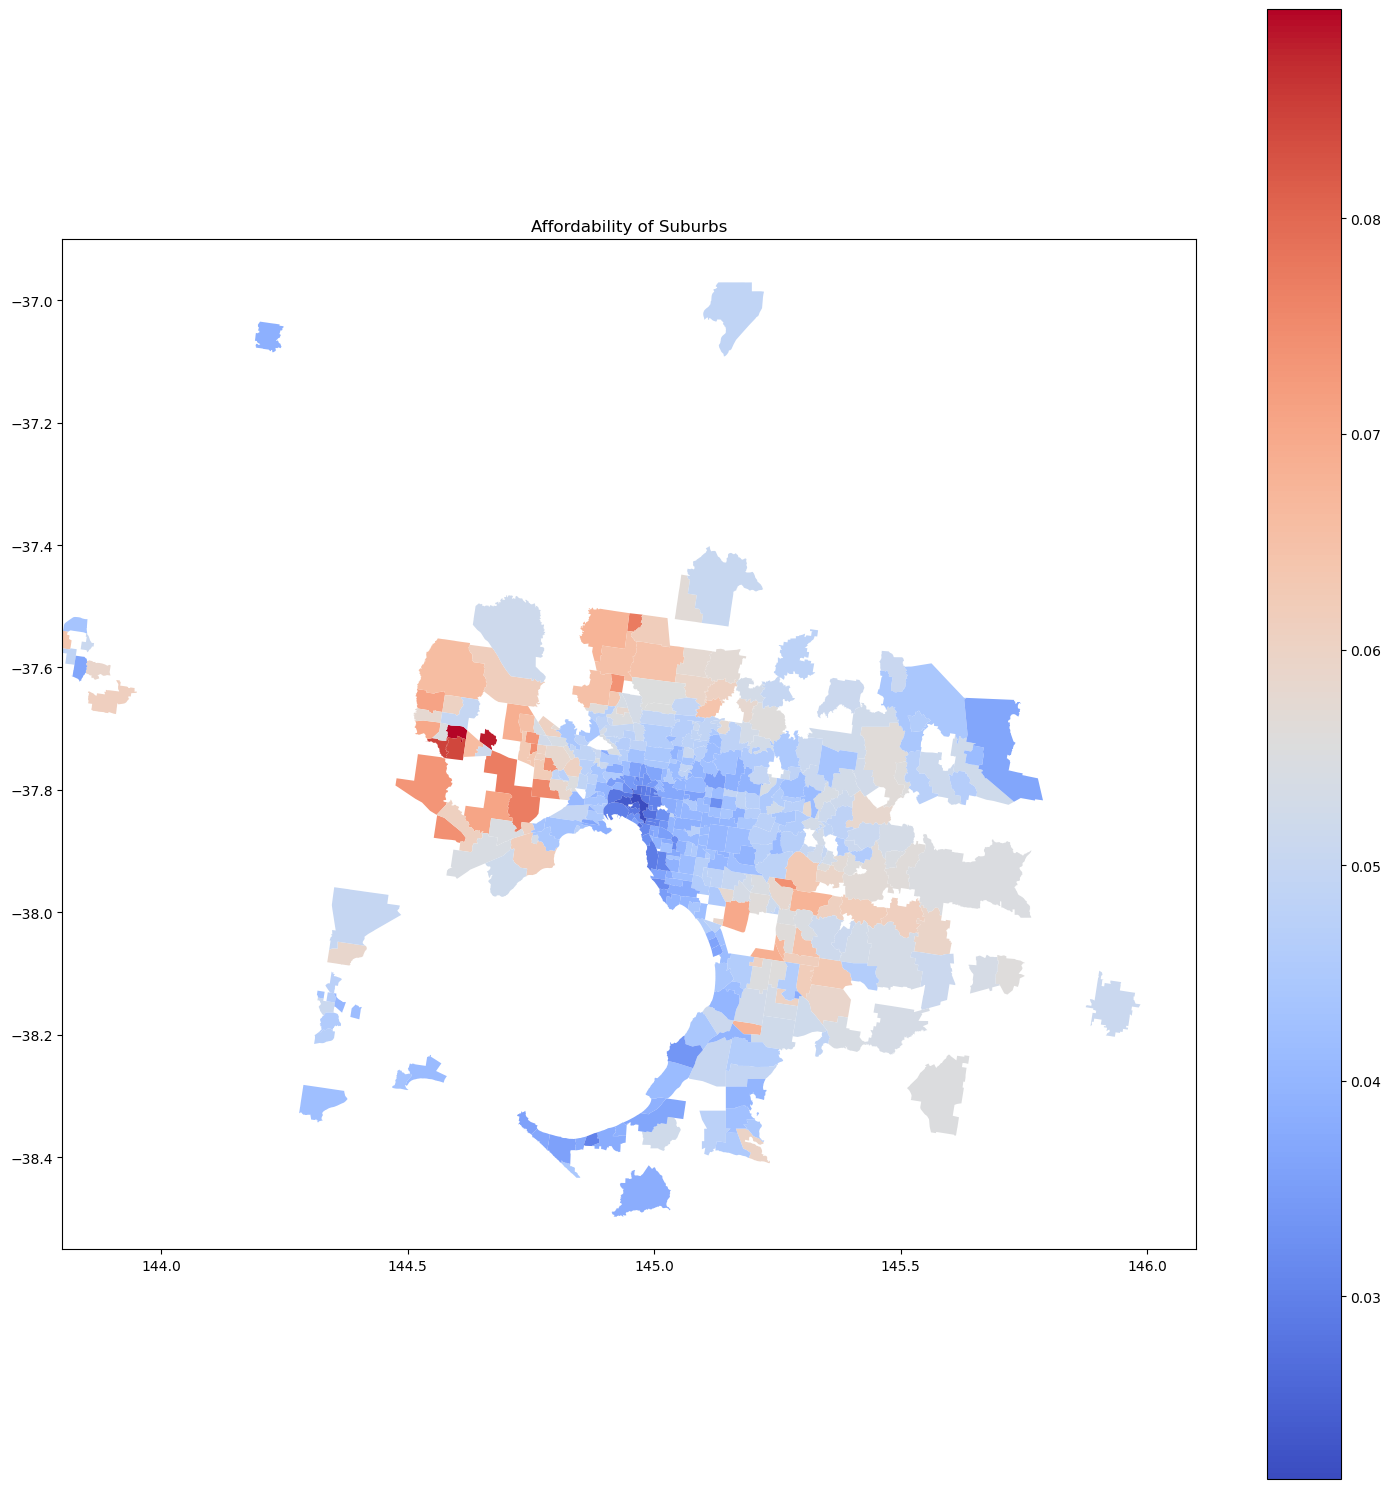

In [295]:
import matplotlib.pyplot as plt

# graph top 10 residuals
fig, ax = plt.subplots(figsize=(15, 15))
suburbs_sorted_2024.plot(column='affordability_index', ax=ax, legend=True, cmap='coolwarm')
plt.title('Affordability of Suburbs')

# Set the limits for the plot to zoom in on the greater melbourne
ax.set_xlim([143.8, 146.1])  # Longitude limits
ax.set_ylim([-38.55, -36.9])  # Latitude limits

plt.tight_layout()

# Save the plot
plt.savefig(f'../../plots/affordability_score_map.png')

plt.show()